In [4]:
import pandas as pd
import json

In [5]:
def read_log_file(file_name: str):
    logs = []
    with open(file_name) as f: 
        for one_line in f:
            one_line = json.loads(one_line) 
            logs.append(one_line)
    return logs

In [6]:
def etl_logs(
    bs:int,
    temp:int,
    warmup:int,
    wd: float,
    drop:float,
    model_type: str='base',
):
    log_id = f"{model_type}_bs{bs}_t{temp}_warmup{warmup}_wd{wd}_drop{drop}"
    log_file = log_id + ".txt"
    print(log_file)
    logs = read_log_file(log_file)

    df = pd.DataFrame(logs)
    df_sub = df[['epoch', 'test_acc1']]
    df_sub = df_sub.rename(columns={"test_acc1": "test_acc1" + "_"  + log_id})
    df_sub = df_sub.set_index('epoch')
    return df_sub

In [20]:
model_type='deit3_small'
bs=2048
temp=1
warmup=30
wd=0.05
drop=0.05
appendix = f"{model_type}_bs{bs}_t{temp}_warmup{warmup}_wd{wd}_drop{drop}"
appendix

'deit3_small_bs2048_t1_warmup30_wd0.05_drop0.05'

In [55]:
df = etl_logs(bs=2048,
    temp=0,
    warmup=5,
    wd=0.05,
    drop=0.05,
    model_type='deit3_small',
)
len(df)

deit3_small_bs2048_t0_warmup5_wd0.05_drop0.05.txt


800

In [56]:
df2 = etl_logs(bs=2048,
    temp=14,
    warmup=10,
    wd=0.05,
    drop=0.05,
    model_type='deit3_small',
)
len(df2)

deit3_small_bs2048_t14_warmup10_wd0.05_drop0.05.txt


800

In [57]:
df = df.join(df2)

In [58]:
df3 = etl_logs(bs=2048,
    temp=14,
    warmup=10,
    wd=0.05,
    drop=0.1,
    model_type='deit3_small',
)
len(df3)

deit3_small_bs2048_t14_warmup10_wd0.05_drop0.1.txt


564

In [59]:
df = df.join(df3)

In [60]:
df4 = etl_logs(bs=2048,
    temp=14,
    warmup=5,
    wd=0.05,
    drop=0.1,
    model_type='deit3_small',
)
len(df4)

deit3_small_bs2048_t14_warmup5_wd0.05_drop0.1.txt


451

In [61]:
df = df.join(df4)

In [62]:
df5 = etl_logs(bs=2048,
    temp=14,
    warmup=10,
    wd=0.1,
    drop=0.05,
    model_type='deit3_small',
)
len(df5)

deit3_small_bs2048_t14_warmup10_wd0.1_drop0.05.txt


329

In [63]:
df = df.join(df5)

In [64]:
df6 = etl_logs(bs=2048,
    temp=1,
    warmup=30,
    wd=0.05,
    drop=0.05,
    model_type='deit3_small',
)
len(df6)

deit3_small_bs2048_t1_warmup30_wd0.05_drop0.05.txt


488

In [65]:
df = df.join(df6)

In [66]:
df.columns

Index(['test_acc1_deit3_small_bs2048_t0_warmup5_wd0.05_drop0.05',
       'test_acc1_deit3_small_bs2048_t14_warmup10_wd0.05_drop0.05',
       'test_acc1_deit3_small_bs2048_t14_warmup10_wd0.05_drop0.1',
       'test_acc1_deit3_small_bs2048_t14_warmup5_wd0.05_drop0.1',
       'test_acc1_deit3_small_bs2048_t14_warmup10_wd0.1_drop0.05',
       'test_acc1_deit3_small_bs2048_t1_warmup30_wd0.05_drop0.05'],
      dtype='object')

In [67]:
selected_columns = [
    # 'test_acc1_deit3_small_bs2048_t14_warmup10_wd0.05_drop0.1',
    # 'test_acc1_deit3_small_bs2048_t14_warmup5_wd0.05_drop0.1',
    'test_acc1_deit3_small_bs2048_t14_warmup10_wd0.05_drop0.05',
    # 'test_acc1_deit3_small_bs2048_t0_warmup5_wd0.05_drop0.05',
    # 'test_acc1_deit3_small_bs2048_t14_warmup10_wd0.1_drop0.05',
    'test_acc1_deit3_small_bs2048_t1_warmup30_wd0.05_drop0.05',
]

<Axes: xlabel='epoch'>

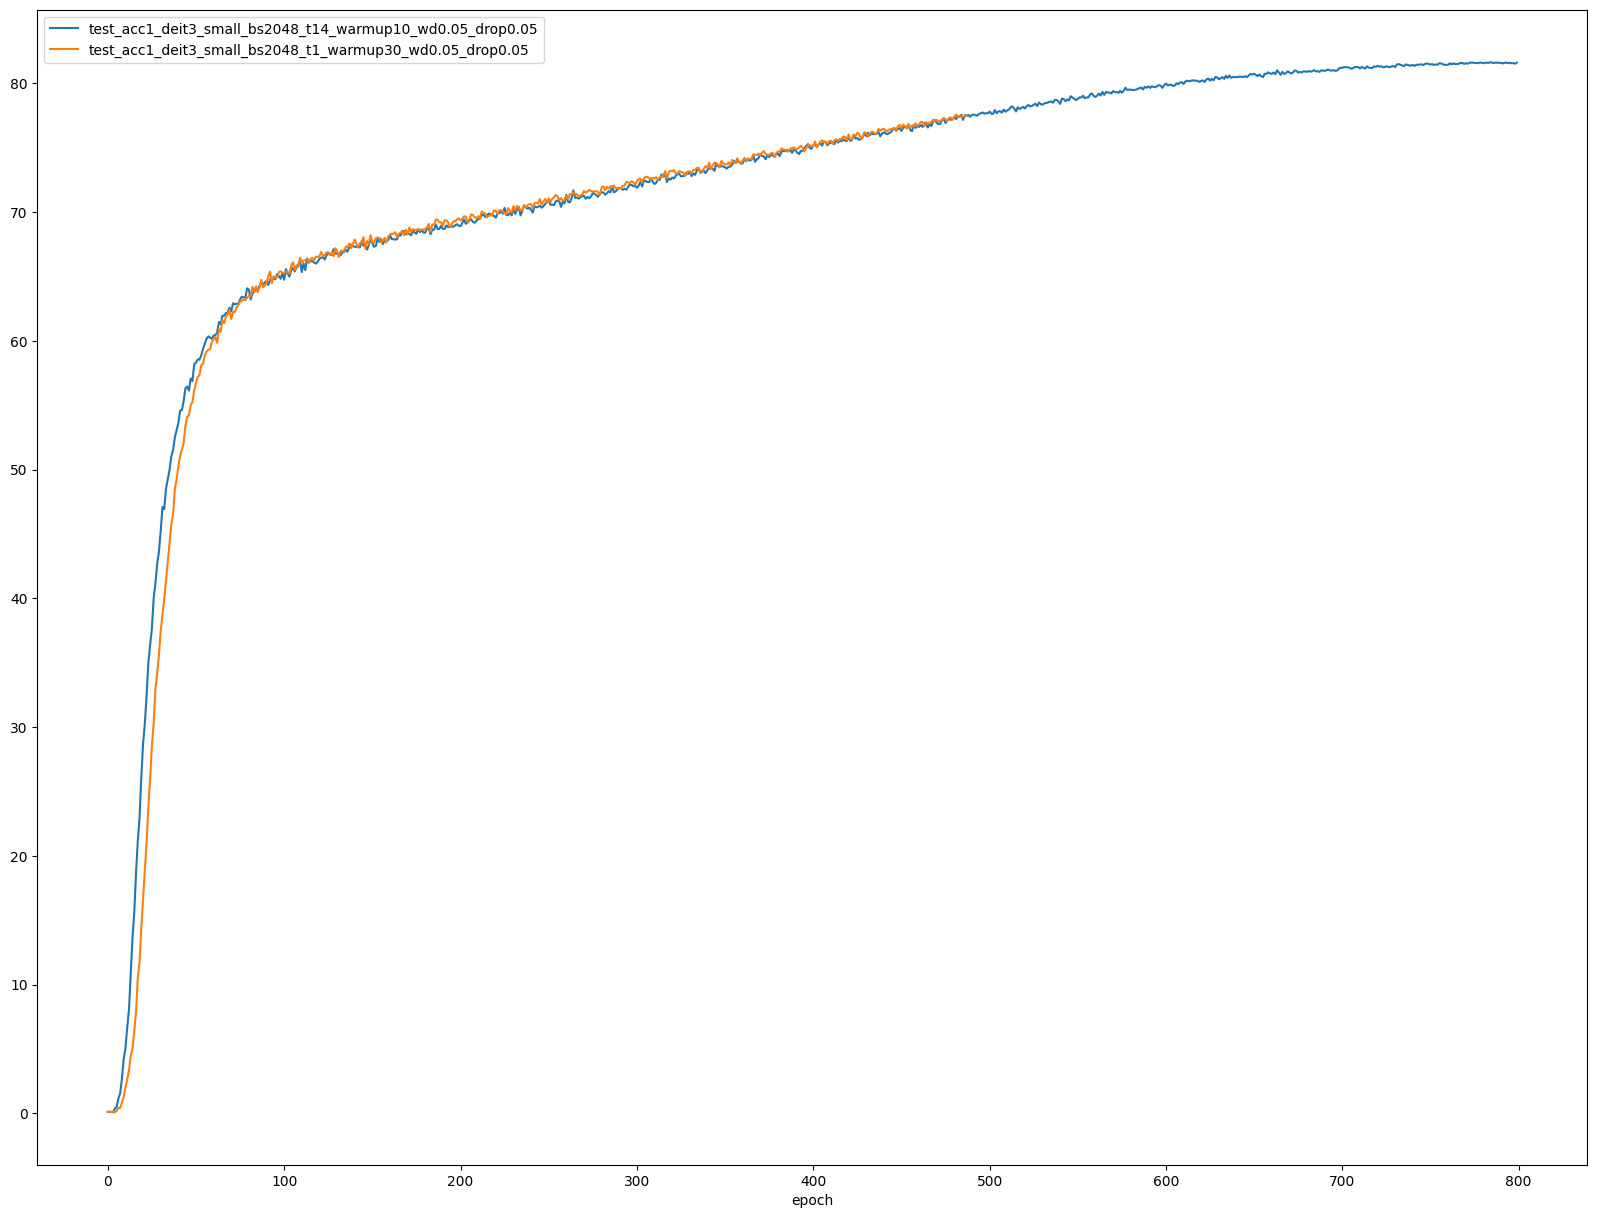

In [68]:
df.plot(figsize=(20,15),y=selected_columns)

<Axes: xlabel='epoch'>

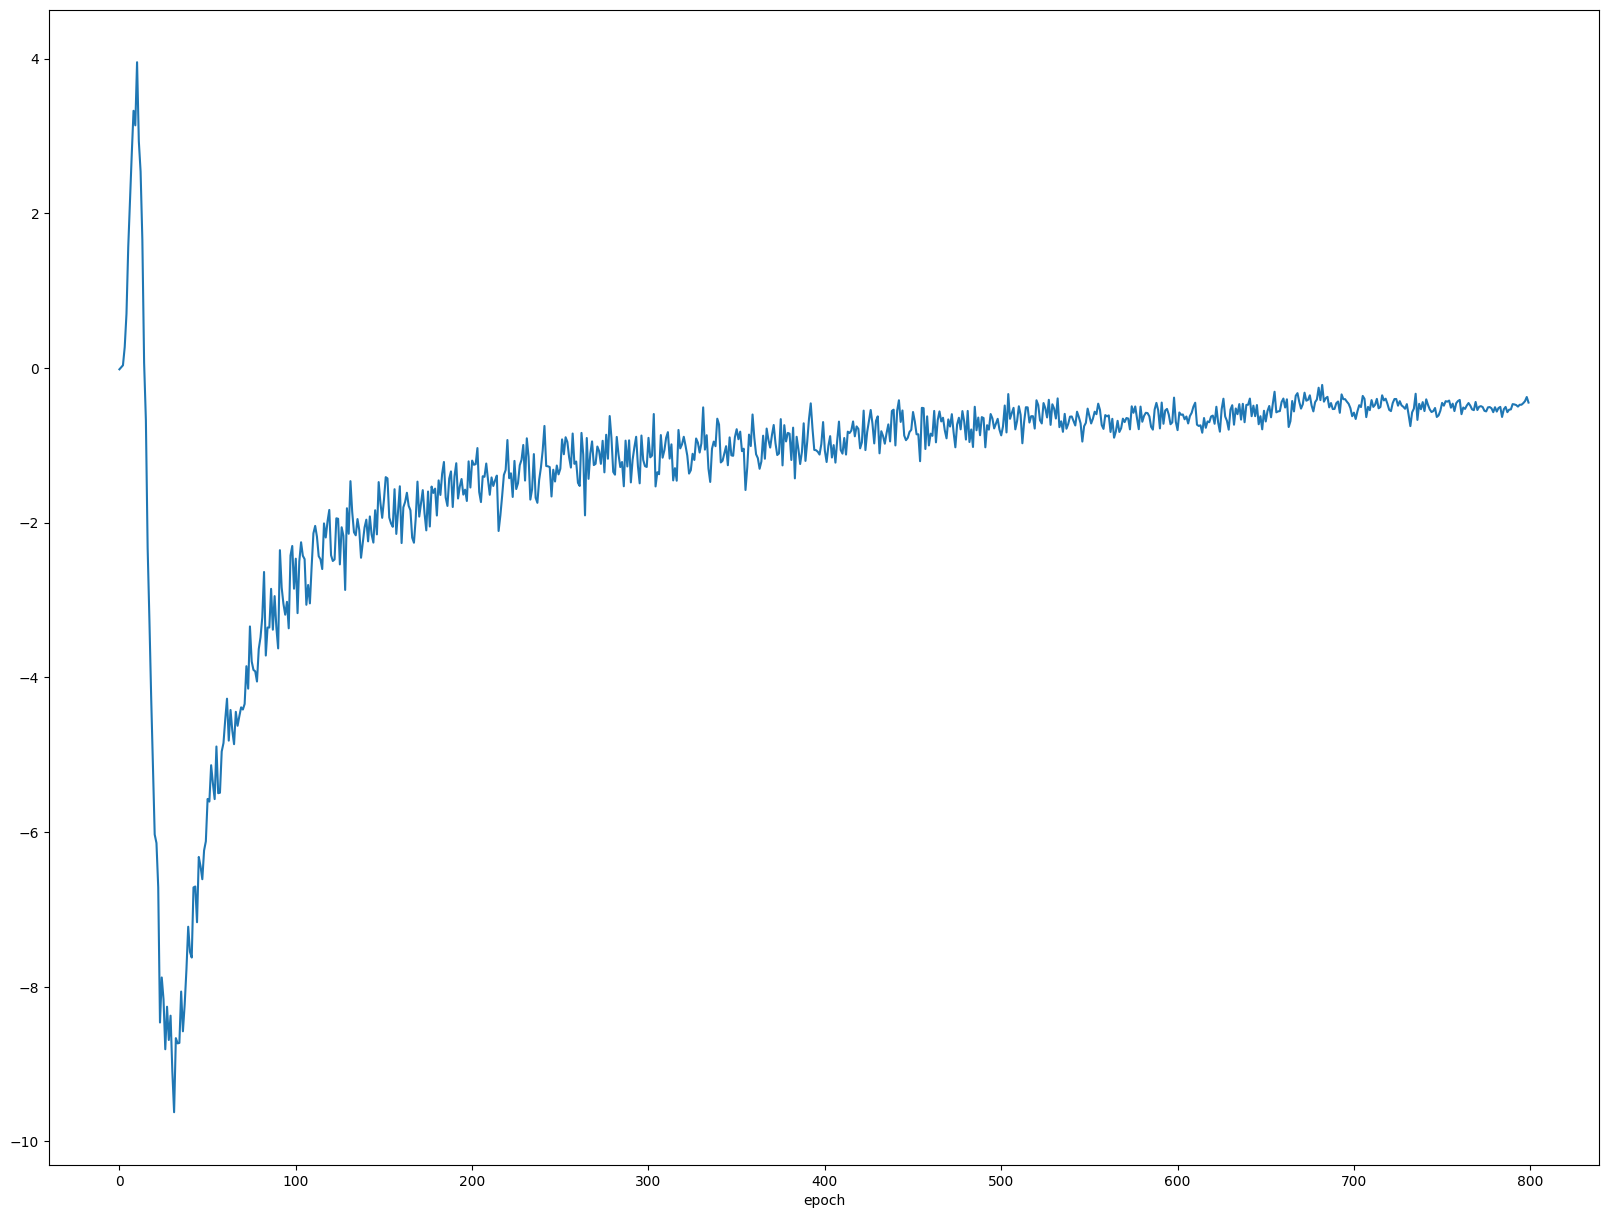

In [110]:
(df['test_acc1_deit3_small_bs2048_t0_warmup5_wd0.05_drop0.05'] - df['test_acc1_deit3_small_bs2048_t14_warmup10_wd0.05_drop0.05']).plot(figsize=(20,15))

Base model

In [126]:
df = etl_logs(bs=1024,
    temp=14,
    warmup=10,
    wd=0.05,
    drop=0.1,
)
len(df)

base_bs1024_t14_warmup10_wd0.05_drop0.1.txt


300

In [128]:
df2 = etl_logs(bs=1024,
    temp=14,
    warmup=20,
    wd=0.05,
    drop=0.1,
)
len(df2)

base_bs1024_t14_warmup20_wd0.05_drop0.1.txt


300

In [129]:
df = df.join(df2)

In [130]:
df3 = etl_logs(bs=1024,
    temp=14,
    warmup=30,
    wd=0.05,
    drop=0.1,
)
len(df3)

base_bs1024_t14_warmup30_wd0.05_drop0.1.txt


300

In [131]:
df = df.join(df3)

In [132]:
df4 = etl_logs(bs=768,
    temp=14,
    warmup=10,
    wd=0.05,
    drop=0.1,
)
len(df4)

base_bs768_t14_warmup10_wd0.05_drop0.1.txt


110

In [133]:
df = df.join(df4)

In [134]:
df5 = etl_logs(bs=1024,
    temp=14,
    warmup=10,
    wd=0.05,
    drop=0.2,
)
len(df5)

base_bs1024_t14_warmup10_wd0.05_drop0.2.txt


300

In [135]:
df = df.join(df5)

In [136]:
df

,test_acc1_base_bs1024_t14_warmup10_wd0.05_drop0.1,test_acc1_base_bs1024_t14_warmup20_wd0.05_drop0.1,test_acc1_base_bs1024_t14_warmup30_wd0.05_drop0.1,test_acc1_base_bs768_t14_warmup10_wd0.05_drop0.1,test_acc1_base_bs1024_t14_warmup10_wd0.05_drop0.2
epoch,,,,,
0,0.556000,0.556000,0.556000,0.612,0.526000
1,0.728000,0.728000,0.728000,0.740,0.700000
2,3.278000,3.124000,2.796000,3.124,3.240000
3,6.314000,6.414000,5.886000,6.190,6.162000
4,9.714000,9.434000,8.668000,10.010,9.388000
...,...,...,...,...,...
295,81.378003,81.378002,81.412002,NaN,82.314003
296,81.442002,81.332003,81.386003,NaN,82.380002
297,81.434002,81.348002,81.380002,NaN,82.332003


<Axes: xlabel='epoch'>

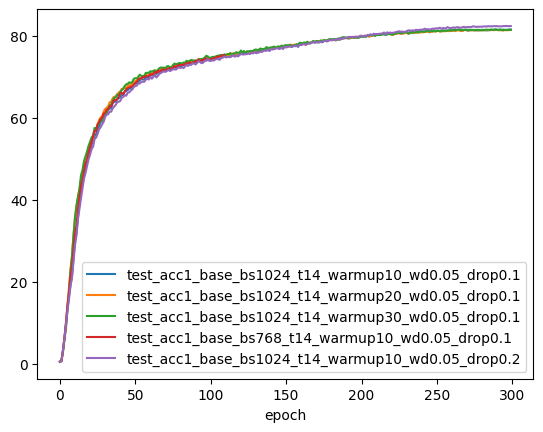

In [137]:
df.plot()

In [138]:
for col in df.columns:
    print(col)

test_acc1_base_bs1024_t14_warmup10_wd0.05_drop0.1
test_acc1_base_bs1024_t14_warmup20_wd0.05_drop0.1
test_acc1_base_bs1024_t14_warmup30_wd0.05_drop0.1
test_acc1_base_bs768_t14_warmup10_wd0.05_drop0.1
test_acc1_base_bs1024_t14_warmup10_wd0.05_drop0.2


In [139]:
selected_columns = [
    'test_acc1_base_bs1024_t14_warmup10_wd0.05_drop0.2',
    'test_acc1_base_bs1024_t14_warmup10_wd0.05_drop0.1',
]

<Axes: xlabel='epoch'>

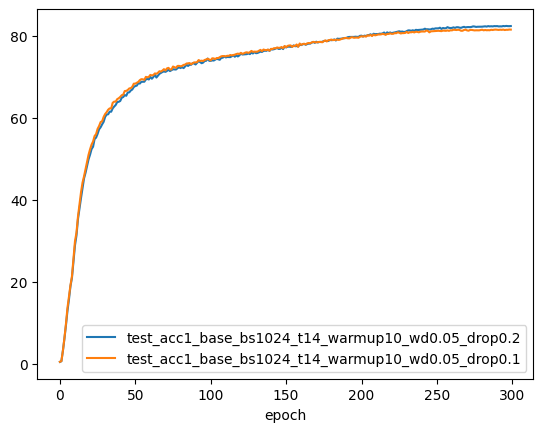

In [140]:
df.plot(y = selected_columns)

Small model

In [142]:
df_small = etl_logs(bs=1024,
    temp=8,
    warmup=10,
    wd=0.05,
    drop=0.1,
    model_type='small',
)
len(df_small)

small_bs1024_t8_warmup10_wd0.05_drop0.1.txt


300

In [146]:
df_small_2 = etl_logs(bs=1024,
    temp=14,
    warmup=10,
    wd=0.05,
    drop=0.1,
    model_type='small',
)
len(df_small_2)

small_bs1024_t14_warmup10_wd0.05_drop0.1.txt


300

In [147]:
df_small = df_small.join(df_small_2)

In [150]:
df_small_3 = etl_logs(bs=1024,
    temp=14,
    warmup=5,
    wd=0.05,
    drop=0.1,
    model_type='small',
)
len(df_small_3)

small_bs1024_t14_warmup5_wd0.05_drop0.1.txt


300

In [151]:
df_small = df_small.join(df_small_3)

<Axes: xlabel='epoch'>

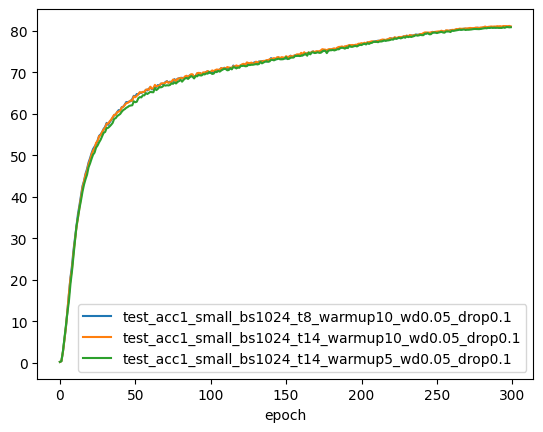

In [152]:
df_small.plot()